In [7]:
pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import math
import sklearn



In [9]:
# Load Data 
start_date = dt.datetime(2018,1,1)
end_date = dt.datetime(2023,12,31)
data = yf.download("GOOGL",start_date, end_date)

pd.set_option('display.max_rows', 4)
pd.set_option('display.max_columns',5)
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2018-01-02   52.651001   53.799000  ...   53.598984  31766000
2018-01-03   53.696499   54.805000  ...   54.513435  31318000
...                ...         ...  ...         ...       ...
2023-12-28  140.779999  141.139999  ...  140.069244  16045700
2023-12-29  139.630005  140.360001  ...  139.529861  18727200

[1509 rows x 6 columns]


In [10]:
# Training and Testing Split: 80/20
training_data_len = math.ceil(len(data) * .8)

# Splitting
train_data = data[:training_data_len].iloc[:, :1]
test_data = data[training_data_len:].iloc[:, :1]

print(train_data.shape, test_data.shape)

print(train_data)

(1208, 1) (301, 1)
                  Open
Date                  
2018-01-02   52.651001
2018-01-03   53.696499
...                ...
2022-10-17   98.860001
2022-10-18  103.129997

[1208 rows x 1 columns]


In [11]:
# Here, we choose to use the mrkt open price
dataset_train = train_data.Open.values 

# Reshape the array from 1D to 2D 
dataset_train = np.reshape(dataset_train, (-1, 1))

dataset_train.shape

(1208, 1)

In [13]:
# Normalization using sklearn MinMaxScaler 
# Scaling using sklearn fit_transform 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(dataset_train)

print(scaled_train)

[[0.03366526]
 [0.04391183]
 [0.05526099]
 ...
 [0.49761842]
 [0.48654371]
 [0.52839247]]


In [15]:
# DOING THE SAME FOR TESTING DATA
# Selecting Open Price values
dataset_test = test_data.Open.values 
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  

print(scaled_test)

[[0.26001071]
 [0.25983271]
 [0.22156964]
 [0.29186693]
 [0.31144335]
 [0.19629827]
 [0.16230639]
 [0.12226367]
 [0.1783235 ]
 [0.17885738]
 [0.09859408]
 [0.01637299]
 [0.        ]
 [0.03345786]
 [0.06228867]
 [0.05428004]
 [0.1219078 ]
 [0.16533194]
 [0.17245054]
 [0.22886638]
 [0.22245953]
 [0.20590854]
 [0.23794263]
 [0.2116035 ]
 [0.18775576]
 [0.20804406]
 [0.22851037]
 [0.20715431]
 [0.18384059]
 [0.16764547]
 [0.27798535]
 [0.24292584]
 [0.24915468]
 [0.24737503]
 [0.19594239]
 [0.17761162]
 [0.14895882]
 [0.13009429]
 [0.219968  ]
 [0.17440819]
 [0.1375689 ]
 [0.09539066]
 [0.08649228]
 [0.04822921]
 [0.06549209]
 [0.0491191 ]
 [0.03043245]
 [0.06050902]
 [0.02811892]
 [0.02171207]
 [0.02811892]
 [0.07456834]
 [0.08809392]
 [0.03683929]
 [0.02473749]
 [0.0526784 ]
 [0.01032215]
 [0.06727174]
 [0.10820435]
 [0.0969923 ]
 [0.11852637]
 [0.11995014]
 [0.09467877]
 [0.17262854]
 [0.22334929]
 [0.22601883]
 [0.18099304]
 [0.19754404]
 [0.21195937]
 [0.21498493]
 [0.20412889]
 [0.23

In [31]:
# X_train and y_train from the training set and x_test and y_test from the testing set
# this is a naive framework that uses past 50 day prices to predict the 51st. 
# TODO: add additional features: 
"""
Here are a few potential additional features that you could consider:

1. Date and Time Features
Day of the Week: Certain patterns may exist depending on the day of the week.
Month of the Year: Seasonal trends could affect the values.
Hour of the Day: If the data has hourly frequency, different hours might show different patterns.
2. Lagged Variables
Previous Days' Prices: Not just the immediate past 50 prices, but also prices from a week ago, a month ago, etc.
Moving Averages: Rolling means over different windows (e.g., 7-day, 30-day) can capture trends and smooth out noise.
3. External Factors
Economic Indicators: For example, GDP, unemployment rates, inflation rates, etc.
Weather Data: Temperature, precipitation, humidity, etc., can affect markets like energy, agriculture, or retail sales.
Events and Holidays: Public holidays, major events, etc., can cause anomalies in data.
Political Events: Elections, policy changes, geopolitical events, etc.
4. Technical Indicators (if it's financial data)
Volume: Trading volume can indicate market strength.
Volatility: Measures of volatility (e.g., standard deviation of past returns) can provide additional context.
Other Technical Indicators: RSI (Relative Strength Index), MACD (Moving Average Convergence Divergence), Bollinger Bands, etc.
5. Sentiment Analysis
News Sentiment: Sentiment scores from news articles, social media, or other text data sources relevant to the domain.
Social Media Trends: Mentions and trends on platforms like Twitter, Reddit, etc.
6. Domain-Specific Features
Energy: Demand forecasts, production levels, storage levels, regulatory changes, etc.
Retail: Sales promotions, marketing campaigns, inventory levels, etc.
Healthcare: Disease outbreak data, patient influx rates, etc.
"""

# TRAINING SET 
X_train = []
y_train = []

for i in range(50, len(scaled_train)): 
    X_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

# TESTING SET 
X_test = []
y_test = []
for i in range(50, len(scaled_test)):
    X_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

print(X_train)

[array([0.03366526, 0.04391183, 0.05526099, 0.05837761, 0.06207734,
       0.0657232 , 0.0601172 , 0.06271931, 0.06163633, 0.0764402 ,
       0.07450459, 0.07596977, 0.07532294, 0.07816024, 0.09129308,
       0.09832998, 0.09623753, 0.09957955, 0.09980989, 0.09477235,
       0.09775662, 0.09392457, 0.07012367, 0.0569859 , 0.02433504,
       0.04932181, 0.03702197, 0.02036575, 0.03545387, 0.03218535,
       0.03430229, 0.04857695, 0.05344296, 0.05313916, 0.06114631,
       0.06608092, 0.06583099, 0.07229942, 0.07810143, 0.0674677 ,
       0.06136191, 0.0360958 , 0.04596999, 0.05771605, 0.05316854,
       0.06511556, 0.07604327, 0.08856361, 0.09188603, 0.0791305 ]), array([0.04391183, 0.05526099, 0.05837761, 0.06207734, 0.0657232 ,
       0.0601172 , 0.06271931, 0.06163633, 0.0764402 , 0.07450459,
       0.07596977, 0.07532294, 0.07816024, 0.09129308, 0.09832998,
       0.09623753, 0.09957955, 0.09980989, 0.09477235, 0.09775662,
       0.09392457, 0.07012367, 0.0569859 , 0.02433504, 0.04

## Reshaping Data for RNN
np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) transforms the X_train array, which was originally a 2-dimensional array of shape (samples, features), into a 3-dimensional array of shape (samples, time steps, features), where time steps denotes the number of time steps in the input sequence and features denotes the number of features in the input data. 
Size 1 is an additional dimension that serves as an indication that each time step only has a single feature.
The y_train array is transformed from a 1-dimensional array of shape (samples) into a 2-dimensional array of shape (samples, 1) by np.reshape(y_train, (y_train.shape[0], 1)), where each row represents the output value at a certain time step. 


In [33]:
# Convert into Numpy Array and Reshape - make suitable for RNN 
X_train, y_train = np.array(X_train), np.array(y_train)

# RESHAPING: 
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)


X_train : (1158, 50, 1) y_train : (1158, 1)


In [34]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (251, 50, 1) y_test : (251, 1)


In [36]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
  Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ---------------------------------------- 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 0.7/385.2 MB 15.0 MB/s eta 0:00:26
   ---------------------------------------- 1.9/385.2 MB 17.2 MB/s eta 0:00:23
   ---------------------------------------- 3.8/385.2 MB 26.9 MB/s eta 0:00:15
    --------------------------------------- 5.8/385.2 MB 33.6 MB/s eta 0:00:12
    --------------------------------------- 7.9/385.2 MB 33.7 MB/s eta 0:00:12
    --------------------------------------- 9.4/385.2 MB 35.4 MB/s eta 0:00:11
   - -------------------------------------- 12.1/385.2 MB 50.4 MB/s eta 0:00:08
   - -------------------------------------- 13.8/385.2 MB 46.7 MB/s eta 0:00:08
  


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# importing libraries
# pip install tensorflow 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error


## SimpleRNN Model

Using the Keras API, this code creates a recurrent neural network (RNN) with four layers of basic RNNs and a dense output layer. It makes use of the tanh hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.


In [40]:


# initialization of the RNN 
regressor = Sequential()

# add RNN layers and dropout regularization 
regressor.add(SimpleRNN(units = 50, # Number of Neurons in the RNN Layer
                        activation = "relu", 
                        return_sequences = True, # This setting returns the full sequence output, required when stacking RNN layers
                        input_shape = (X_train.shape[1], 1)))

regressor.add(Dropout(0.2)) # This layer helps to prevent overfitting by randomly setting 20% of the inputs to 0 at each update during training time

# Two more hidden layers 
regressor.add(SimpleRNN(units = 50, 
                        activation = "relu",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "relu",
                        return_sequences = True))

# This is the final SimpleRNN layer in the network. It does not return sequences (default return_sequences = False), so it only returns the last output in the output sequence.
regressor.add(SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1, activation='sigmoid'))

# compiling RNN using STOCHASTIC GRADIENT DESCENT Optimizer 
regressor.compile(optimizer = SGD(learning_rate=0.01, # The initial learning rate
                                  decay=1e-6, # The learning rate decay over each update
                                  momentum=0.9, # Momentum parameter that accelerates gradient vectors in the right direction, thus leading to faster converging
                                  nesterov=True), # Nesterov momentum is a variant of the momentum technique.
                  loss = "mean_squared_error") # The loss function used is mean squared error, which is typical for regression tasks

# fitting the model
regressor.fit(X_train, y_train, 
              epochs = 20, # The number of times the learning algorithm will work through the entire training dataset
              batch_size = 2) # The number of training examples used in one iteration.


regressor.summary()


Epoch 1/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - loss: 0.0135
Epoch 2/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0022
Epoch 3/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0017
Epoch 4/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0016
Epoch 5/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0016
Epoch 6/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0012
Epoch 7/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0014
Epoch 8/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0013
Epoch 9/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0015
Epoch 10/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0014
Epoch 11/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0011
Epoch 12/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0011
Epoch 13/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0011
Epoch 14/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0013
Epoch 15/20
579/579 ━━━━━━━━━━━━━━━━━━━━ 9

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 50, 50)         │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 50, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_7 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,604 (139.08 KB)

 Trainable params: 17,801 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,803 (69.55 KB)

## LSTM RNN Model:  
This code creates a LSTM Model with three layers and a dense output layer. It employs the optimizer as Adam, mean squared error as the loss function, and accuracy as the evaluation metric while compiling. With a batch size of 1, it fits the model to the training data for 10 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [41]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50, # 50: Specifies the number of memory units (neurons) in the LSTM layer.
					return_sequences = True, #  Indicates that the layer should return the full sequence of outputs for each input sequence. This is necessary for stacking LSTM layers, as the next LSTM layer expects a 3D input.
					input_shape = (X_train.shape[1],1))) # : Defines the shape of the input data. The first dimension is the number of time steps (sequence length), and 1 represents the number of features at each time step.
regressorLSTM.add(LSTM(50, 
					return_sequences = False)) # This adds another LSTM layer with 50 units, but here return_sequences=False (the default). This means this layer will return only the last output for the entire input sequence, which is typical for the last LSTM layer when preparing for output.
regressorLSTM.add(Dense(25)) # Adds a fully connected (dense) layer with 25 neurons. This layer processes the output from the previous LSTM layer.

#Adding the output layer
regressorLSTM.add(Dense(1)) # This final dense layer has one neuron, which is suitable for regression tasks (predicting a single continuous value).

#Compiling the model
regressorLSTM.compile(optimizer = 'adam', # Uses the Adam optimizer, which is effective for training deep learning models.
					loss = 'mean_squared_error',
					metrics = ["accuracy"]) # Includes accuracy as a metric to monitor during training and validation, though it's more relevant for classification tasks.

#Fitting the model
regressorLSTM.fit(X_train, 
				y_train, 
				batch_size = 1, 
				epochs = 12)
regressorLSTM.summary()


Epoch 1/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 5.9901e-04 - loss: 0.0096
Epoch 2/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0022 - loss: 0.0015
Epoch 3/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 7.2583e-04 - loss: 0.0010
Epoch 4/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0023 - loss: 0.0012
Epoch 5/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 5.7345e-04 - loss: 6.3224e-04
Epoch 6/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0013 - loss: 5.1984e-04
Epoch 7/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0027 - loss: 6.3363e-04
Epoch 8/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0022 - loss: 5.9515e-04
Epoch 9/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0023 - loss: 6.3387e-04
Epoch 10/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.0011 - loss: 6.3344e-04
Epoch 11/12
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accu

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,705 (373.85 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,804 (249.24 KB)

## GRU RNN Model: 
This code defines a recurrent neural network (RNN) model using the GRU (Gated Recurrent Unit) layer in Keras. It consists of four stacked GRU layers followed by a single output layer. It makes use of the ‘tanh’ hyperbolic tangent activation function. To avoid overfitting, a dropout layer with a rate of 0.2 is introduced. It employs the optimizer as Stochastic Gradient Descent (SGD) with a learning rate of 0.01, the decay rate of 1e-7, the momentum of 0.9, and Nesterov is set to False. The mean squared error is the loss function, and accuracy is the evaluation metric while compiling. With a batch size of 2, it fits the model to the training data for 20 epochs. The number of parameters in each layer and the overall number of parameters in the model are listed in a summary of the model architecture.

In [43]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, # Specifies that this GRU layer has 50 memory units.
					return_sequences=True,
					input_shape=(X_train.shape[1],1),
					activation='tanh')) # Uses the tanh activation function
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50, 
					return_sequences=True, # The first two layers have return_sequences=True to pass the full sequence to the next GRU layer.
					activation='tanh'))

regressorGRU.add(GRU(units=50, 
					return_sequences=True, # The first two layers have return_sequences=True to pass the full sequence to the next GRU layer.
					activation='tanh'))

regressorGRU.add(GRU(units=50, # The last GRU layer does not return sequences (default return_sequences=False), so it only outputs the last time step's value.
					activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1, # Adds a dense layer with one neuron (suitable for regression tasks). The ReLU activation function is applied to the output.
					activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
								decay=1e-7, 
								momentum=0.9, 
								nesterov=False),
					loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()


Epoch 1/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 0.0178
Epoch 2/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 24s 21ms/step - loss: 0.0021
Epoch 3/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0021
Epoch 4/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0018
Epoch 5/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0015
Epoch 6/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0015
Epoch 7/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0017
Epoch 8/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0014
Epoch 9/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 24s 20ms/step - loss: 0.0012
Epoch 10/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0014
Epoch 11/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - loss: 0.0013
Epoch 12/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0014
Epoch 13/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0013
Epoch 14/20
1158/1158 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - loss: 0.0012
E

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_4 (GRU)                     │ (None, 50, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ (None, 50, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_7 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,804 (421.11 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,903 (210.56 KB)

In [44]:
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step


In [45]:
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)


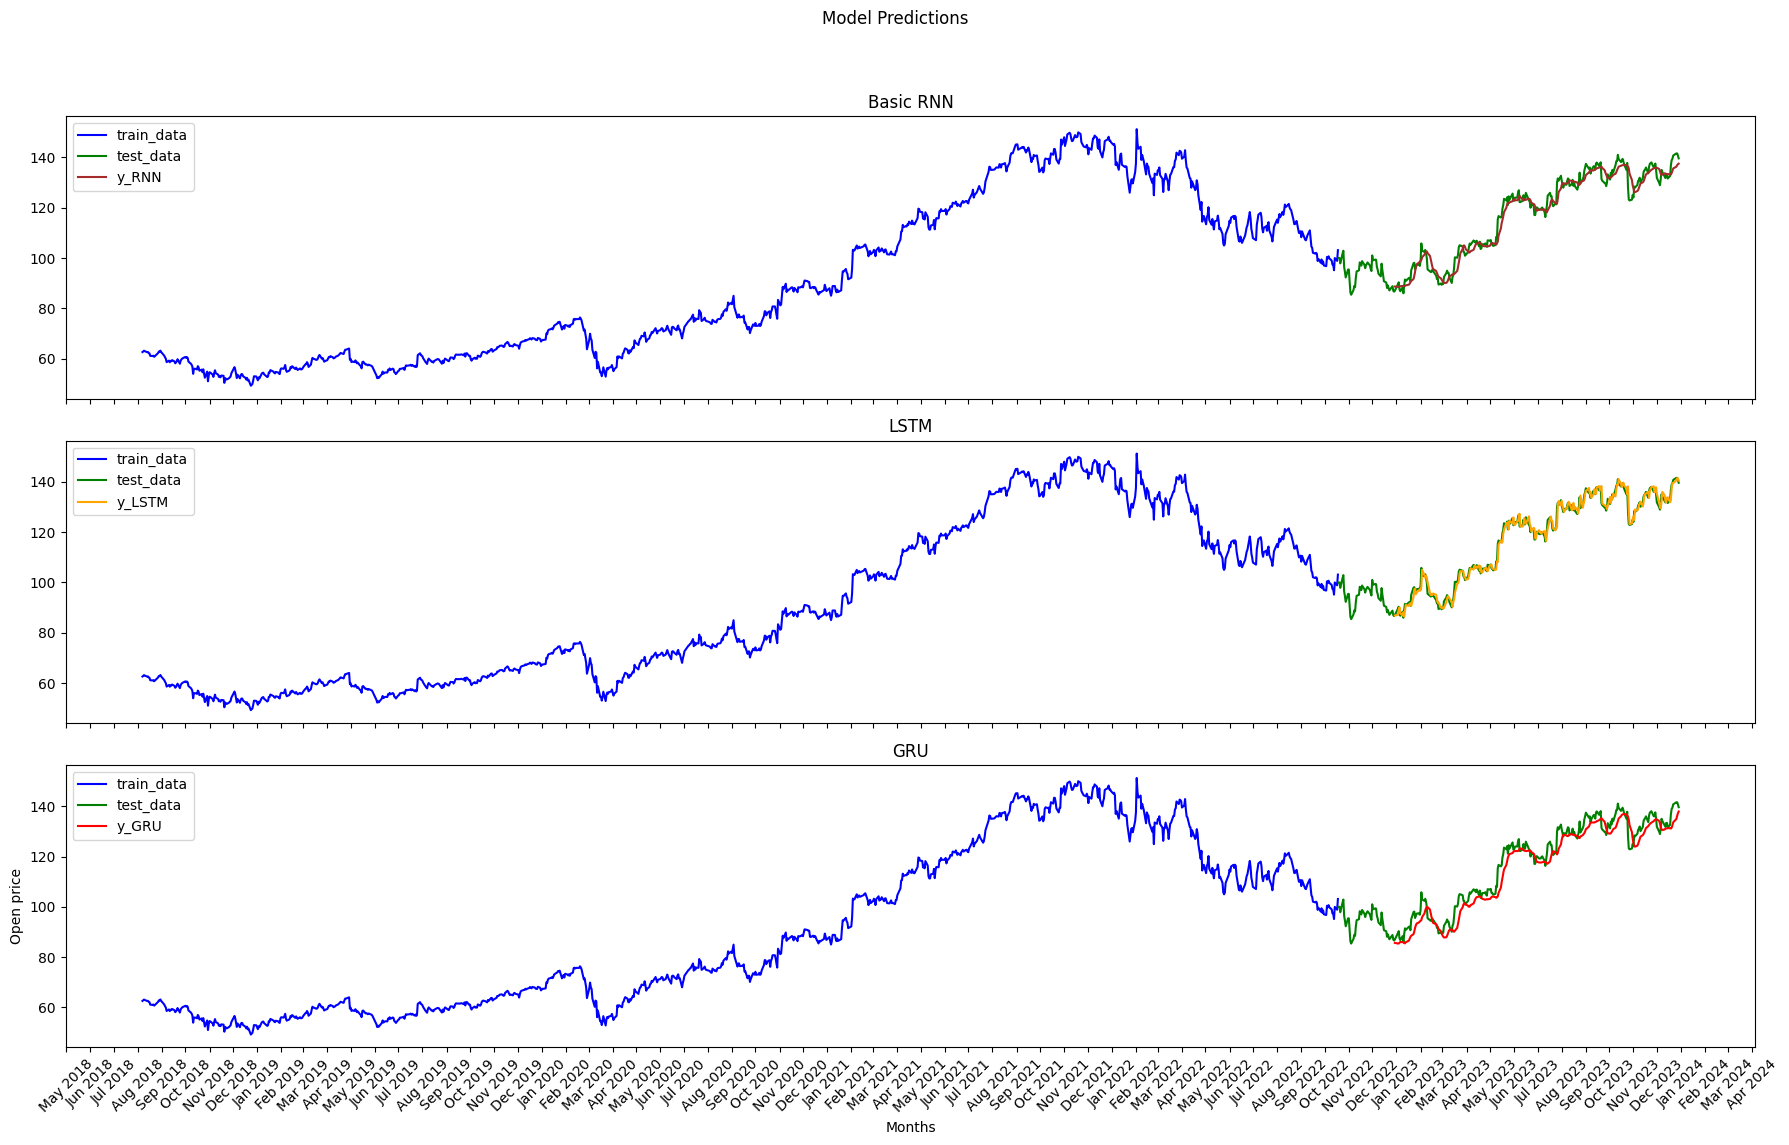

In [48]:
import matplotlib.dates as mdates

fig, axs = plt.subplots(3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle('Model Predictions')

# Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data.Open[150:], label="train_data", color="b")
axs[0].plot(test_data.index, test_data.Open, label="test_data", color="g")
axs[0].plot(test_data.index[50:], y_RNN_O, label="y_RNN", color="brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")

# Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data.Open[150:], label="train_data", color="b")
axs[1].plot(test_data.index, test_data.Open, label="test_data", color="g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label="y_LSTM", color="orange")
axs[1].legend()
axs[1].title.set_text("LSTM")

# Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data.Open[150:], label="train_data", color="b")
axs[2].plot(test_data.index, test_data.Open, label="test_data", color="g")
axs[2].plot(test_data.index[50:], y_GRU_O, label="y_GRU", color="red")
axs[2].legend()
axs[2].title.set_text("GRU")

# Format x-axis to show only months
for ax in axs:
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Show abbreviated month and year
    ax.xaxis.set_major_locator(mdates.MonthLocator())  # Place a tick at the start of each month

plt.xlabel("Months")
plt.ylabel("Open price")

plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_RNN_O, y_LSTM_O, and y_GRU_O are the predictions from the respective models
# and test_data.Open[50:] contains the actual values for comparison.

# Evaluate RNN model
mse_rnn = mean_squared_error(test_data.Open[50:], y_RNN_O)
r2_rnn = r2_score(test_data.Open[50:], y_RNN_O)
print(f"RNN Model - MSE: {mse_rnn:.4f}, R-squared: {r2_rnn:.4f}")

# Evaluate LSTM model
mse_lstm = mean_squared_error(test_data.Open[50:], y_LSTM_O)
r2_lstm = r2_score(test_data.Open[50:], y_LSTM_O)
print(f"LSTM Model - MSE: {mse_lstm:.4f}, R-squared: {r2_lstm:.4f}")

# Evaluate GRU model
mse_gru = mean_squared_error(test_data.Open[50:], y_GRU_O)
r2_gru = r2_score(test_data.Open[50:], y_GRU_O)
print(f"GRU Model - MSE: {mse_gru:.4f}, R-squared: {r2_gru:.4f}")


RNN Model - MSE: 9.9552, R-squared: 0.9627
LSTM Model - MSE: 4.5034, R-squared: 0.9831
GRU Model - MSE: 18.5283, R-squared: 0.9305
